### <span style="color:red;"><em> Анализ конформационных и физико-химических свойств регуляторных геномных последовательностей</em></span>


#### <span><em> Analysis of conformational and physicochemical properties of regulatory genomic sequences</em></span>

In [1]:
from Bio import SeqIO
import matplotlib.pyplot as plt
import pandas as pd
import random


### <span style="color:blue;"><em>Loading Data + Initial Data Analysis: </em></span>

In [2]:
#load fasta
fasta_path = 'epd_fasta.txt' 
sequences = {record.id: str(record.seq) for record in SeqIO.parse(fasta_path, 'fasta')}  # запись в словарь

In [3]:
# test
# first 5 
for i, (name, seq) in enumerate(sequences.items()):
    if i >= 5: break
    print(f"{name}: {seq}")

# Nucleotide counting
print("Всего сиквенсов:", len(sequences))
print("Ширина:", len(list(sequences.values())[0]))

FP004492: GCCGCGGGCCCCGCCCCCGACCGGCGGCGGCTGCGGCGGCCCAGCGCGGCAGTCGGCGCTGCGAAGTGGAGGCGCTGCGAG
FP004858: AAACAACAATGGCCGCTCCACAGAGTCGCCCCAGACGCGGCGAGCTGATCCTGCTGTGCGCGCTGCTGGGAACGCTGTGGG
FP001238: CCCCGCCCCTCCCGCGGCCCGTCAGCCTCTGCCGCGGAGCTGCGTCCGCCACTCATGTTTCTCCGAGCAGGCCTGGCCGCG
FP000805: CACAGGAGGGCGGGCTAAAGAGGTCGCGGTCGCACGCGCAGTTGGTCCTTAGTACTGCGGCCGTGTGGGTGAGTTGGCTGC
FP013285: AGCGGCCGCTGACATCACGCGGCCTGAGGCGGCGGCGGCGCCCCCGGCCCAGACCCGCAGCCCCCTTGGCAGAGGCGCCGC
Всего сиквенсов: 16455
Ширина: 81


In [4]:
#loading dinucleotide parameters
param_dinucl_path = 'fisical_param_dinucleotides.xls'
df_params_dinucl = pd.read_excel(param_dinucl_path, engine='xlrd', index_col=0)
# создаем словарь с параметрами 
dict_params_dinucl = df_params_dinucl.to_dict(orient='index')

In [5]:
print(df_params_dinucl)
df_params_dinucl.info()

                                          AA     AC     AG     AT     CA  \
PropertyName                                                               
Roll                                   1.400  1.400  5.500 -1.200 -1.200   
Slide                                 -0.160 -0.430  0.340 -0.570  1.880   
Roll stiffness                         0.020  0.023  0.019  0.022  0.017   
Slide stiffness                        2.260  3.030  2.030  3.830  1.780   
Mobility to bend towards major groove  1.180  1.060  1.060  1.120  1.060   
Ultrsasonic                            0.919  0.913  0.900  0.904  1.160   

                                          CC     CG     CT    GA     GC  \
PropertyName                                                              
Roll                                   3.900  6.200  5.500  0.40 -6.800   
Slide                                  0.280  0.680  0.340 -0.01  0.310   
Roll stiffness                         0.019  0.016  0.019  0.02  0.026   
Slide stiffness 

In [6]:
#test
# проверка словаря
print(dict_params_dinucl.keys())
print(dict_params_dinucl.items())
len(dict_params_dinucl)

dict_keys(['Roll', 'Slide', 'Roll stiffness', 'Slide stiffness', 'Mobility to bend towards major groove', 'Ultrsasonic'])
dict_items([('Roll', {'AA': 1.4, 'AC': 1.4, 'AG': 5.5, 'AT': -1.2, 'CA': -1.2, 'CC': 3.9, 'CG': 6.2, 'CT': 5.5, 'GA': 0.4, 'GC': -6.8, 'GG': 3.9, 'GT': 1.4, 'TA': -0.6, 'TC': 0.4, 'TG': -1.2, 'TT': 1.4}), ('Slide', {'AA': -0.16, 'AC': -0.43, 'AG': 0.34, 'AT': -0.57, 'CA': 1.88, 'CC': 0.28, 'CG': 0.68, 'CT': 0.34, 'GA': -0.01, 'GC': 0.31, 'GG': 0.28, 'GT': -0.43, 'TA': 0.38, 'TC': -0.01, 'TG': 1.88, 'TT': -0.16}), ('Roll stiffness', {'AA': 0.02, 'AC': 0.023, 'AG': 0.019, 'AT': 0.022, 'CA': 0.017, 'CC': 0.019, 'CG': 0.016, 'CT': 0.019, 'GA': 0.02, 'GC': 0.026, 'GG': 0.019, 'GT': 0.023, 'TA': 0.016, 'TC': 0.02, 'TG': 0.017, 'TT': 0.02}), ('Slide stiffness', {'AA': 2.26, 'AC': 3.03, 'AG': 2.03, 'AT': 3.83, 'CA': 1.78, 'CC': 1.65, 'CG': 2.0, 'CT': 2.03, 'GA': 1.93, 'GC': 2.61, 'GG': 1.65, 'GT': 3.03, 'TA': 1.2, 'TC': 1.93, 'TG': 1.78, 'TT': 2.26}), ('Mobility to bend tow

6

<span style="color:blue;"><em>Были обнаружены невалидные символы ('N'), решение для исключения:</em></span>

In [7]:
# Удаление последовательностей, содержащих невалидные символы
valid_nucleotides = {'A', 'C', 'T', 'G'}
sequences_to_delete = []

for seq_id, seq in sequences.items():
    if any(nucleotide not in valid_nucleotides for nucleotide in seq):
        print(f"Найдена последовательность с невалидными символами: {seq_id}: {seq}")
        sequences_to_delete.append(seq_id)

Найдена последовательность с невалидными символами: FP008093: GNCCGCCGTCGCCGTCAGGGCCCCAGGGAGCGCGGGGCGCCGCTGCTGCTGTTCTTCGGCTCGGTTCTGTCTACCGGGCAG


In [8]:
# Удаление обнаруженных последовательностей
for seq_id in sequences_to_delete:
    del sequences[seq_id]

print(f"Последовательности удалены. Осталось: {len(sequences)}")

Последовательности удалены. Осталось: 16454


In [9]:
#loading tetranucleotide parameters

param_tetra_path = 'Tetranucleotides_ultrasonic.xls' 
df_params_tetra = pd.read_excel(param_tetra_path, engine='xlrd', index_col=0)
df_params_tetra = df_params_tetra.T
print(df_params_tetra)
df_params_tetra.info()

AAAA    AAAC   AAAG   AAAT   CAAA   CAAC   CAAG   CAAT   GAAA   GAAC   GAAG  \
0.894  0.883  0.915  0.951  0.921  0.877  0.938  0.935  0.921  0.887  0.936   

AAAA   ...   CTTG   CTTT   GTTA   GTTC   GTTG   GTTT   TTTA  TTTC   TTTG  \
0.894  ...  0.954  0.926  1.041  0.954  0.966  0.945  0.937  0.89  0.932   

AAAA    TTTT  
0.894  0.897  

[1 rows x 255 columns]
<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 0.894 to 0.894
Columns: 255 entries, AAAC to TTTT
dtypes: float64(255)
memory usage: 2.0+ KB


In [10]:
# loading hexamer parameters

param_hexa_path = 'Hexamer.xls' 
df_params_hexa = pd.read_excel(param_hexa_path, engine='xlrd', index_col=0)
df_params_hexa = df_params_hexa.T
print(df_params_hexa)
df_params_hexa.info()

Hexamer                              AAAAAA    AAAAAC    AAAAAG    AAAAAT  \
Cleavage rate (methylation-blind)  0.005185  0.011819  0.006797  0.004211   

Hexamer                              AAAACA    AAAACC    AAAACG    AAAACT  \
Cleavage rate (methylation-blind)  0.014411  0.020934  0.006286  0.011535   

Hexamer                              AAAAGA    AAAAGC  ...    TTTTCG   TTTTCT  \
Cleavage rate (methylation-blind)  0.016404  0.018892  ...  0.028754  0.03843   

Hexamer                              TTTTGA    TTTTGC    TTTTGG    TTTTGT  \
Cleavage rate (methylation-blind)  0.127696  0.141639  0.130094  0.169151   

Hexamer                              TTTTTA   TTTTTC    TTTTTG    TTTTTT  
Cleavage rate (methylation-blind)  0.007146  0.00614  0.015311  0.003595  

[1 rows x 4096 columns]
<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Cleavage rate (methylation-blind) to Cleavage rate (methylation-blind)
Columns: 4096 entries, AAAAAA to TTTTTT
dtypes: float64(4096)
memory u

### <span style="color:blue;"><em>Sequence generation and complementation:</em></span>

In [11]:
#def
#reverse complementary sequences:
def reverse_complement(seq):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A'} 
    return ''.join(complement[base] for base in reversed(seq)) #генератор списка

In [12]:
#creating complementary sequences
reverse_complement_sequences = {name: reverse_complement(seq) for name, seq in sequences.items()} #новый словарь с комплим.послед

In [13]:
# test
# first 5 reverse-complementary sequences
for i, (name, seq) in enumerate(reverse_complement_sequences.items()):
    if i >= 5: break
    print(f"{name}: {seq}")

len(reverse_complement_sequences)

FP004492: CTCGCAGCGCCTCCACTTCGCAGCGCCGACTGCCGCGCTGGGCCGCCGCAGCCGCCGCCGGTCGGGGGCGGGGCCCGCGGC
FP004858: CCCACAGCGTTCCCAGCAGCGCGCACAGCAGGATCAGCTCGCCGCGTCTGGGGCGACTCTGTGGAGCGGCCATTGTTGTTT
FP001238: CGCGGCCAGGCCTGCTCGGAGAAACATGAGTGGCGGACGCAGCTCCGCGGCAGAGGCTGACGGGCCGCGGGAGGGGCGGGG
FP000805: GCAGCCAACTCACCCACACGGCCGCAGTACTAAGGACCAACTGCGCGTGCGACCGCGACCTCTTTAGCCCGCCCTCCTGTG
FP013285: GCGGCGCCTCTGCCAAGGGGGCTGCGGGTCTGGGCCGGGGGCGCCGCCGCCGCCTCAGGCCGCGTGATGTCAGCGGCCGCT


16454

In [14]:
# def
# create random sequences for testing and validation 81x2500
def generate_sequences(count=2500, seq_length=81):
    random_sequences = {}
    for i in range(count):
        random_seq = ''.join(random.choices(['A', 'C', 'G', 'T'], k=seq_length))
        random_sequences[f'random_{i}'] = random_seq
    return random_sequences

In [15]:
random_sequences = generate_sequences()

In [16]:
# test
# first 5 reverse-complementary sequences
for i, (name, seq) in enumerate(random_sequences.items()):
    if i >= 5: break
    print(f"{name}: {seq}")

len(random_sequences)

random_0: GCCGTGGCCTCCGAACGAGACTCCTTCCTGTCTCGCTAGCTATCGCTTTTCGGCGAGCCGACCTCACTCTAAGGGTGATAC
random_1: AGGAATGTACTACGGTTCATCATTATAGGTGCGGCGTGCCCGGCCACGGGTTCTGATTAATGTAGAAAAACCTAAATTACT
random_2: AGACAGTGCGGAGGCGGACCGAGATCGGGCATCAGCAATACACGTTCGATGTACACCTGCTAAGCCCTTACTGCTAATGAT
random_3: AGCCATGGCTACATCACTATTTCGGCCTAGAAACTCTCGCGCCTCTGTGTTCTGTTAGGCTGTGGTCGAGACTGTGAGGGC
random_4: TCACGTAGACGTAAAATGGCTGGTTTGGAGAAACCAATCCTCGCATTGCTAATTGATTCACTTTCTCGGCGCTCTTGTCGC


2500

### <span style="color:blue;"><em>Data calculation:</em></span>

#### <span style="color:red;"><em>Dinucleotides:</em></span>

In [17]:
# def
# splitting the sequences to dinucleotides

def sequence_to_dinucleotides(seq):
    return [seq[i:i+2] for i in range(len(seq)-1)]

In [18]:
# test
# check function "sequence_to_dinucleotides"
example_sequence = "GCCGCGGGCCCCGCCCCCGACCGGCGGCGGCTGCGGCGGCCCAGCGCGGCAGTCGGCGCTGCGAAGTGGAGGCGCTGCGAG" #сиквенс из fasta
dinucleotides_test = sequence_to_dinucleotides(example_sequence)
print(dinucleotides_test)
len(dinucleotides_test)

['GC', 'CC', 'CG', 'GC', 'CG', 'GG', 'GG', 'GC', 'CC', 'CC', 'CC', 'CG', 'GC', 'CC', 'CC', 'CC', 'CC', 'CG', 'GA', 'AC', 'CC', 'CG', 'GG', 'GC', 'CG', 'GG', 'GC', 'CG', 'GG', 'GC', 'CT', 'TG', 'GC', 'CG', 'GG', 'GC', 'CG', 'GG', 'GC', 'CC', 'CC', 'CA', 'AG', 'GC', 'CG', 'GC', 'CG', 'GG', 'GC', 'CA', 'AG', 'GT', 'TC', 'CG', 'GG', 'GC', 'CG', 'GC', 'CT', 'TG', 'GC', 'CG', 'GA', 'AA', 'AG', 'GT', 'TG', 'GG', 'GA', 'AG', 'GG', 'GC', 'CG', 'GC', 'CT', 'TG', 'GC', 'CG', 'GA', 'AG']


80

In [19]:
# def
# Раcчет средних значений (динуклеотиды)

def calculate_parameters(sequences, df_params_dinucl):
    # создаем словарь results:
    # ключи - параметры "Roll", "Slide" и т.д.), значение - список нулей длиной N−1 (80 динуклеотидов).
    results = {property_name: [0] * (len(list(sequences.values())[0]) - 1) for property_name in dict_params_dinucl}

    for seq in sequences.values(): # Перебор всех последовательностей в fasta (словарь 'sequences')
        dinucleotides = sequence_to_dinucleotides(seq) #разбивка на динуклеотиды
        for i, dinucleotide in enumerate(dinucleotides): 
            for property_name, dinucl_values in dict_params_dinucl.items(): #перебор параметров("Roll", "Slide" и т.д.)
                value = dinucl_values[dinucleotide]  # Извлекаем значения параметра для динуклеотида 
                results[property_name][i] += value # Добавление значения в ячейку
    
    # Усреднение агрегированных значений по количеству промоторов:
    num_promoters = len(sequences)
    for property_name in results:
        results[property_name] = [x / num_promoters for x in results[property_name]]
    
    return results   # возврат словаря со средними значениями параметров для каждой позиции динуклеотида


In [20]:
average_parameters_sequenses = calculate_parameters(sequences, df_params_dinucl)# fasta

In [21]:
average_parameters_reverse = calculate_parameters(reverse_complement_sequences, df_params_dinucl) #обратно-комплиментарные

In [22]:
average_parameters_random = calculate_parameters(random_sequences, df_params_dinucl) #рандомные

In [23]:
#test
print(list(average_parameters_sequenses.keys()))  # Проверка ключей результата
# Прямой вывод значений для параметра, например "Roll", из словаря
print(average_parameters_sequenses['Roll'])
len(average_parameters_sequenses['Roll'])

['Roll', 'Slide', 'Roll stiffness', 'Slide stiffness', 'Mobility to bend towards major groove', 'Ultrsasonic']
[1.6201653093475195, 1.6254770876385183, 1.622796888294882, 1.5914488878086894, 1.601148656861796, 1.5946821441597259, 1.5577549532030996, 1.6736112799322131, 1.5554819496781234, 1.633001093959179, 1.5802114987239566, 1.5794274948343259, 1.6124285887932441, 1.6223836149267088, 1.6224140026743838, 1.5291479275558288, 1.5652971921723482, 1.5241886471376918, 1.547417041449112, 1.495429682752113, 1.331779506503072, 1.251549775130731, 1.326905311778383, 1.4757566549169283, 1.564270086301413, 1.632922085815248, 1.5816032575667884, 1.5133523763220875, 1.5319253676919755, 1.5596511486571065, 1.4822900206638674, 1.4067339248816626, 1.4654491309106141, 1.544323568737329, 1.641740610186231, 1.5338094080468896, 1.4008204691869983, 1.4738969247601574, 1.6611279931934273, 1.593819132126169, 1.589042178194001, 1.5530752400634322, 1.4570256472592218, 1.5558648352986484, 1.4664944694301103, 1.

80

In [24]:
#test
print(average_parameters_random['Roll'])
len(average_parameters_random['Roll'])

[1.2576400000000374, 1.3276400000000341, 1.2612000000000345, 1.3071200000000358, 1.3274000000000374, 1.0986400000000311, 1.3454400000000346, 1.3789200000000346, 1.2580400000000365, 1.2115600000000293, 1.3010800000000333, 1.3760800000000366, 1.1520000000000326, 1.3424000000000347, 1.1514000000000306, 1.3708000000000355, 1.2298800000000307, 1.274880000000034, 1.2408800000000342, 1.2806400000000355, 1.2837200000000295, 1.2265600000000325, 1.1787200000000355, 1.2833600000000311, 1.3818400000000381, 1.1988400000000325, 1.2718000000000316, 1.3714000000000377, 1.2403600000000363, 1.3497200000000351, 1.278080000000035, 1.2584400000000375, 1.2844400000000342, 1.2577600000000329, 1.2566400000000326, 1.3590000000000377, 1.2921600000000344, 1.235440000000034, 1.3145200000000354, 1.263320000000037, 1.2362400000000344, 1.2983600000000362, 1.241400000000035, 1.2086400000000292, 1.3300800000000357, 1.2444000000000337, 1.286640000000034, 1.438320000000039, 1.1298800000000349, 1.2367600000000325, 1.2842

80

#### <span style="color:blue;"><em>Tetranucleotides:</em></span>

In [25]:
# def
# Разбивка последовательности на тетрануклеотиды
def sequence_to_tetranucleotides(seq):
    return [seq[i:i+4] for i in range(len(seq)-3)]

In [26]:
# test
# Проверка функции "sequence_to_tetranucleotides"
tetranucleotides_test = sequence_to_tetranucleotides(example_sequence)
print(tetranucleotides_test)
len(tetranucleotides_test)

['GCCG', 'CCGC', 'CGCG', 'GCGG', 'CGGG', 'GGGC', 'GGCC', 'GCCC', 'CCCC', 'CCCG', 'CCGC', 'CGCC', 'GCCC', 'CCCC', 'CCCC', 'CCCG', 'CCGA', 'CGAC', 'GACC', 'ACCG', 'CCGG', 'CGGC', 'GGCG', 'GCGG', 'CGGC', 'GGCG', 'GCGG', 'CGGC', 'GGCT', 'GCTG', 'CTGC', 'TGCG', 'GCGG', 'CGGC', 'GGCG', 'GCGG', 'CGGC', 'GGCC', 'GCCC', 'CCCA', 'CCAG', 'CAGC', 'AGCG', 'GCGC', 'CGCG', 'GCGG', 'CGGC', 'GGCA', 'GCAG', 'CAGT', 'AGTC', 'GTCG', 'TCGG', 'CGGC', 'GGCG', 'GCGC', 'CGCT', 'GCTG', 'CTGC', 'TGCG', 'GCGA', 'CGAA', 'GAAG', 'AAGT', 'AGTG', 'GTGG', 'TGGA', 'GGAG', 'GAGG', 'AGGC', 'GGCG', 'GCGC', 'CGCT', 'GCTG', 'CTGC', 'TGCG', 'GCGA', 'CGAG']


78

In [27]:
# def
# Раcчет средних значений (тетрануклеотиды)


#### <span style="color:blue;"><em>Hexamers:</em></span>

In [28]:
# def
# Разбивка последовательности на гексамеры
def sequence_to_hexamers(seq):
    return [seq[i:i+6] for i in range(len(seq)-5)]

In [29]:
# test
# Проверка функции "sequence_to_hexamers"
hexamers_test = sequence_to_hexamers(example_sequence)
print(hexamers_test)
len(hexamers_test)

['GCCGCG', 'CCGCGG', 'CGCGGG', 'GCGGGC', 'CGGGCC', 'GGGCCC', 'GGCCCC', 'GCCCCG', 'CCCCGC', 'CCCGCC', 'CCGCCC', 'CGCCCC', 'GCCCCC', 'CCCCCG', 'CCCCGA', 'CCCGAC', 'CCGACC', 'CGACCG', 'GACCGG', 'ACCGGC', 'CCGGCG', 'CGGCGG', 'GGCGGC', 'GCGGCG', 'CGGCGG', 'GGCGGC', 'GCGGCT', 'CGGCTG', 'GGCTGC', 'GCTGCG', 'CTGCGG', 'TGCGGC', 'GCGGCG', 'CGGCGG', 'GGCGGC', 'GCGGCC', 'CGGCCC', 'GGCCCA', 'GCCCAG', 'CCCAGC', 'CCAGCG', 'CAGCGC', 'AGCGCG', 'GCGCGG', 'CGCGGC', 'GCGGCA', 'CGGCAG', 'GGCAGT', 'GCAGTC', 'CAGTCG', 'AGTCGG', 'GTCGGC', 'TCGGCG', 'CGGCGC', 'GGCGCT', 'GCGCTG', 'CGCTGC', 'GCTGCG', 'CTGCGA', 'TGCGAA', 'GCGAAG', 'CGAAGT', 'GAAGTG', 'AAGTGG', 'AGTGGA', 'GTGGAG', 'TGGAGG', 'GGAGGC', 'GAGGCG', 'AGGCGC', 'GGCGCT', 'GCGCTG', 'CGCTGC', 'GCTGCG', 'CTGCGA', 'TGCGAG']


76

In [30]:
# def
# Раcчет средних значений (гексамеры)


### <span style="color:blue;"><em>Plotting graphs:</em></span>

#### <span style="color:red;"><em>Dinucleotides:</em></span>

#### <span style="color:blue;"><em>Сравнение оригинальных сиквенсов с рандомно-сгенерированными:</em></span>

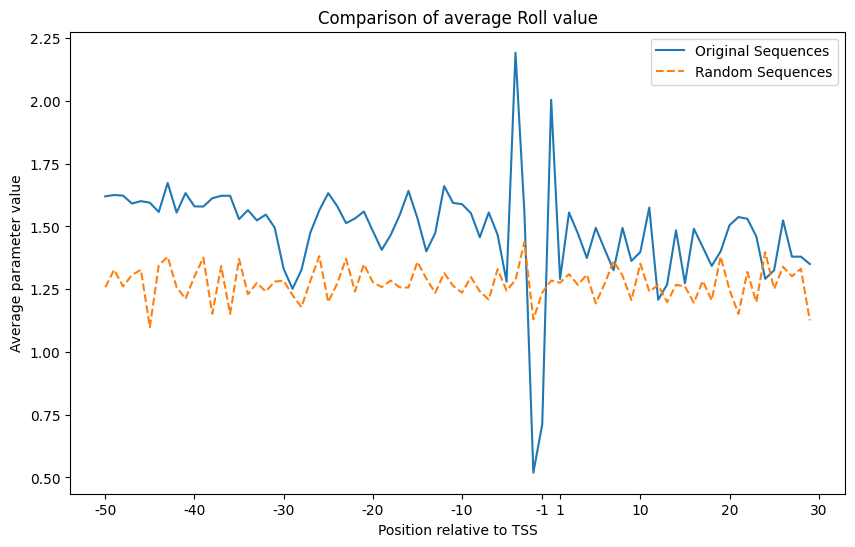

In [41]:
parameter_to_plot = 'Roll'
plt.figure(figsize=(10, 6))
x_coords = list(range(-50, 30))

plt.plot(x_coords, average_parameters_sequenses[parameter_to_plot], label='Original Sequences')
plt.plot(x_coords, average_parameters_random[parameter_to_plot], label='Random Sequences', linestyle='--')
plt.title(f'Comparison of average {parameter_to_plot} value')
plt.xlabel('Position relative to TSS')
plt.ylabel('Average parameter value')
desired_ticks = [-50, -40, -30, -20, -10, -1, 1, 10, 20, 30]
desired_tick_labels = [str(tick) for tick in desired_ticks]  # Преобразуем числа в строки
plt.xticks(desired_ticks, desired_tick_labels) 
plt.legend()
plt.show()


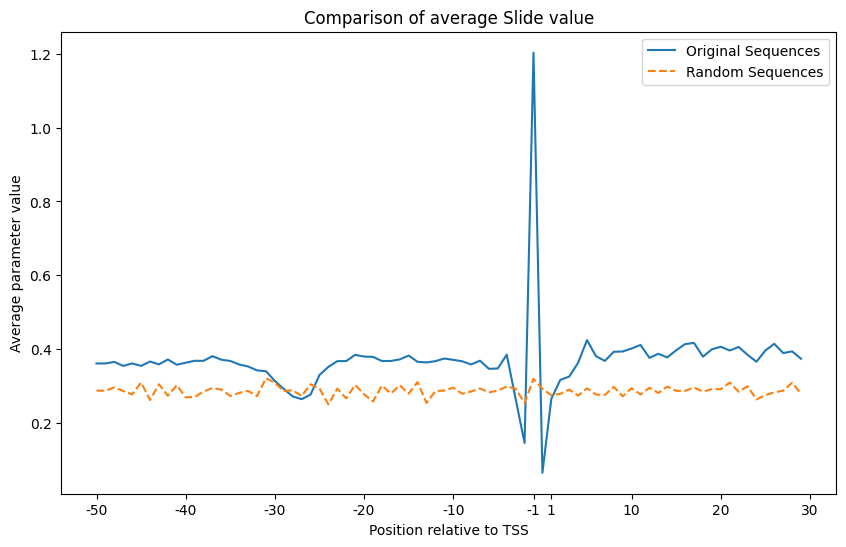

In [42]:
parameter_to_plot = 'Slide'
plt.figure(figsize=(10, 6))
x_coords = list(range(-50, 30))
plt.plot(x_coords, average_parameters_sequenses[parameter_to_plot], label='Original Sequences')
plt.plot(x_coords, average_parameters_random[parameter_to_plot], label='Random Sequences', linestyle='--')
plt.title(f'Comparison of average {parameter_to_plot} value')
plt.xlabel('Position relative to TSS')
plt.ylabel('Average parameter value')
desired_ticks = [-50, -40, -30, -20, -10, -1, 1, 10, 20, 30]
desired_tick_labels = [str(tick) for tick in desired_ticks] 
plt.xticks(desired_ticks, desired_tick_labels) 
plt.legend()
plt.show()

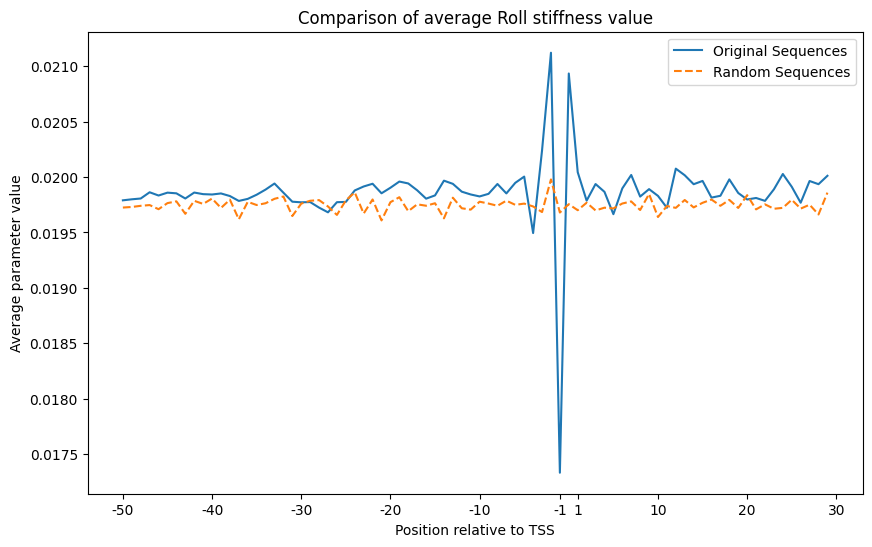

In [43]:
parameter_to_plot = 'Roll stiffness'
plt.figure(figsize=(10, 6))
x_coords = list(range(-50, 30))

plt.plot(x_coords, average_parameters_sequenses[parameter_to_plot], label='Original Sequences')
plt.plot(x_coords, average_parameters_random[parameter_to_plot], label='Random Sequences', linestyle='--')
plt.title(f'Comparison of average {parameter_to_plot} value')
plt.xlabel('Position relative to TSS')
plt.ylabel('Average parameter value')
desired_ticks = [-50, -40, -30, -20, -10, -1, 1, 10, 20, 30]
desired_tick_labels = [str(tick) for tick in desired_ticks] 
plt.xticks(desired_ticks, desired_tick_labels) 
plt.legend()
plt.show()

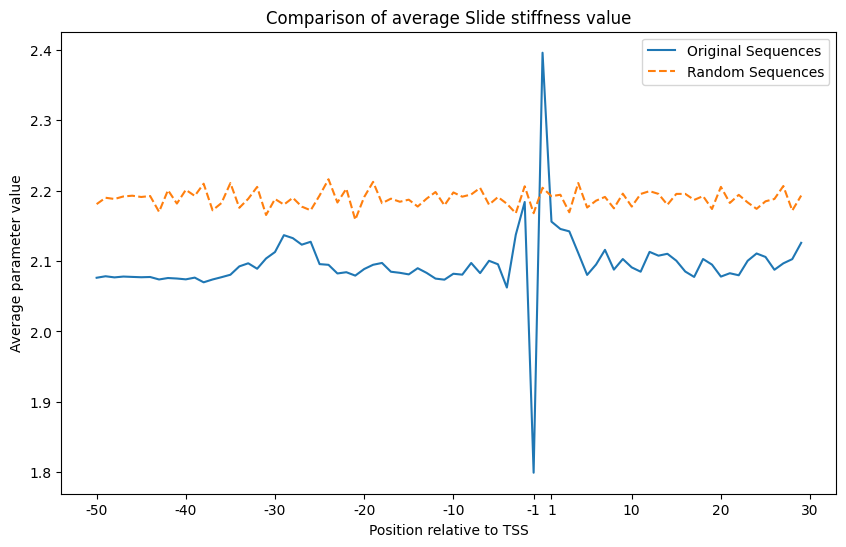

In [44]:
parameter_to_plot = 'Slide stiffness'
plt.figure(figsize=(10, 6))
x_coords = list(range(-50, 30))

plt.plot(x_coords, average_parameters_sequenses[parameter_to_plot], label='Original Sequences')
plt.plot(x_coords, average_parameters_random[parameter_to_plot], label='Random Sequences', linestyle='--')
plt.title(f'Comparison of average {parameter_to_plot} value')
plt.xlabel('Position relative to TSS')
plt.ylabel('Average parameter value')
desired_ticks = [-50, -40, -30, -20, -10, -1, 1, 10, 20, 30]
desired_tick_labels = [str(tick) for tick in desired_ticks]
plt.xticks(desired_ticks, desired_tick_labels) 
plt.legend()
plt.show()

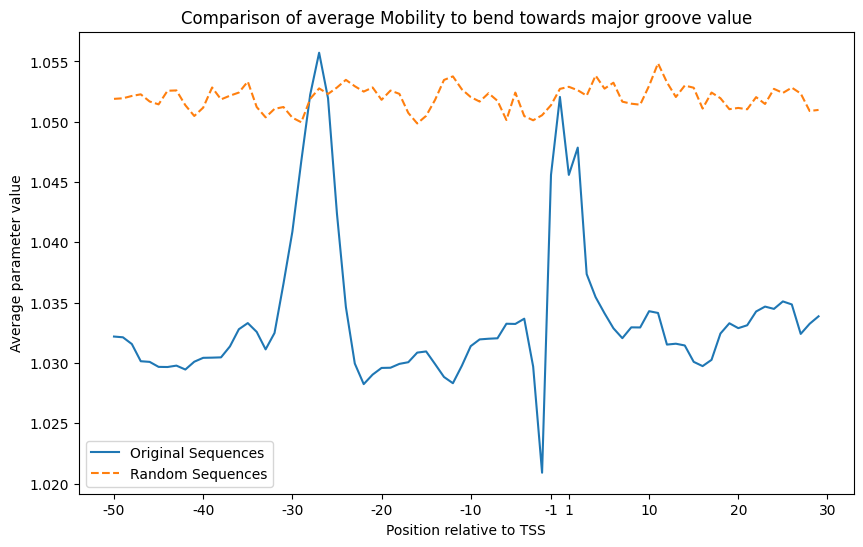

In [45]:
parameter_to_plot = 'Mobility to bend towards major groove'
plt.figure(figsize=(10, 6))
x_coords = list(range(-50, 30))
plt.plot(x_coords, average_parameters_sequenses[parameter_to_plot], label='Original Sequences')
plt.plot(x_coords, average_parameters_random[parameter_to_plot], label='Random Sequences', linestyle='--')
plt.title(f'Comparison of average {parameter_to_plot} value')
plt.xlabel('Position relative to TSS')
plt.ylabel('Average parameter value')
desired_ticks = [-50, -40, -30, -20, -10, -1, 1, 10, 20, 30]
desired_tick_labels = [str(tick) for tick in desired_ticks] 
plt.xticks(desired_ticks, desired_tick_labels) 
plt.legend()
plt.show()

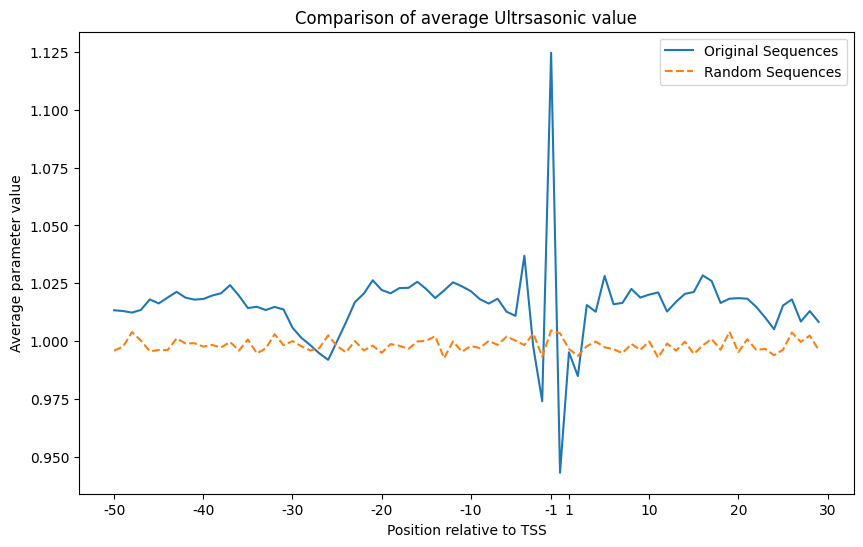

In [46]:
parameter_to_plot = 'Ultrsasonic'
plt.figure(figsize=(10, 6))
x_coords = list(range(-50, 30))
plt.plot(x_coords, average_parameters_sequenses[parameter_to_plot], label='Original Sequences')
plt.plot(x_coords, average_parameters_random[parameter_to_plot], label='Random Sequences', linestyle='--')
plt.title(f'Comparison of average {parameter_to_plot} value')
plt.xlabel('Position relative to TSS')
plt.ylabel('Average parameter value')
desired_ticks = [-50, -40, -30, -20, -10, -1, 1, 10, 20, 30]
desired_tick_labels = [str(tick) for tick in desired_ticks] 
plt.xticks(desired_ticks, desired_tick_labels) 
plt.legend()
plt.show()

#### <span style="color:blue;"><em>Сравнение оригинальных сиквенсов с обратно-комплиментарными:</em></span>

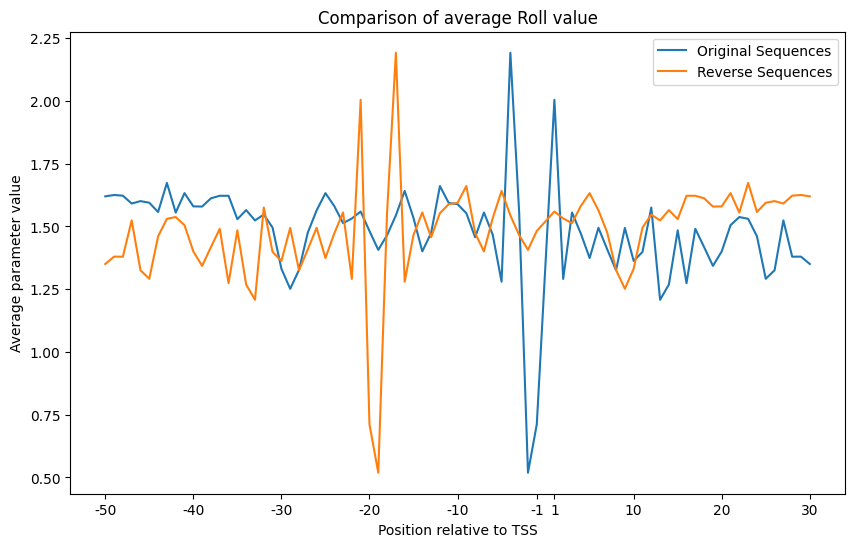

In [47]:
parameter_to_plot = 'Roll'
plt.figure(figsize=(10, 6))
x_coords = list(range(-50, 0)) + list(range(1, 31))
plt.plot(x_coords, average_parameters_sequenses[parameter_to_plot], label='Original Sequences')
plt.plot(x_coords, average_parameters_reverse[parameter_to_plot], label='Reverse Sequences')
plt.title(f'Comparison of average {parameter_to_plot} value')
plt.xlabel('Position relative to TSS')
plt.ylabel('Average parameter value')
desired_ticks = [-50, -40, -30, -20, -10, -1, 1, 10, 20, 30]
desired_tick_labels = [str(tick) for tick in desired_ticks] 
plt.xticks(desired_ticks, desired_tick_labels) 
plt.legend()
plt.show()
